### 웹 크롤링
- 웹 크롤러(Web Crawler)는 웹문서, 이미지 등을 주기적으로 수집하여 자동으로 데이터베이스화하는 프로그램
- 크롤러가 하는 작업을 웹 크롤링(Web Carwling)이라 함
- requests와 beautifulsoup4 패키지 사용

## 1. 웹 문서 전체 가져오기
### 1) urllib.request 패키지
####  1. url 문자열 변환 url 한글 인코딩 디코딩: 
- url 에 한글이 포함될 경우 오류가 나는 경우가 있다. 
-  이때 한글을 url 인코더로 바꿔서 입력해야 한다. 

<pre>
   - urllib 의 quote 와 unquote 사용 
   - quote() : 한글 -> url
   - unquote() : url -> 한글
</pre>
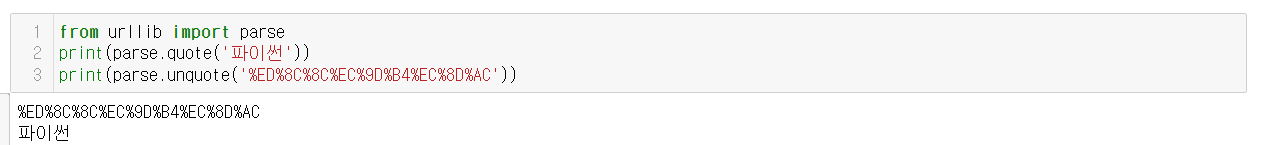
#### 2. 이미지 다운로드
>from urllib import request <br>
>request.urlretrieve('이미지url주소','파일명')

In [1]:
#url 한글 인코딩
from urllib import parse
print(parse.quote('파이썬'))
print(parse.unquote('%ED%8C%8C%EC%9D%B4%EC%8D%AC'))

%ED%8C%8C%EC%9D%B4%EC%8D%AC
파이썬


In [6]:
# url open
from urllib.request import urlopen
from bs4 import BeautifulSoup as BS

#'파이썬' 네이버 지식인

html=urlopen('https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC') 
soup=BS(html,'html.parser')
#print(soup)

In [7]:
# 이미지 다운로드
from urllib import request
request.urlretrieve('https://searcha.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjA3MTdfNSAg%2FMDAxNjU4MDU1NDk1MTMx.gYMOxufPdVxeftoxCjvARt0ySZWV_RTDJR27cvThAY0g.gYfUC3nvJImAhTzwHOvq18hYpwof9EQyo9-6Q6Ob9uEg.JPEG.monica32d%2F%25EA%25B0%2595%25EC%2595%2584%25EC%25A7%253F%25EB%25B6%2584%25EC%2596%2591240.jpg&type=a340','img01.jpg')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [6]:
pwd

'C:\\Users\\yumei\\Desktop\\py\\크롤링_01'

### 2) requests 패키지

In [8]:
import requests
from bs4 import BeautifulSoup as bs

#'파이썬' 네이버 지식인 검색어:'파이썬'

html=requests.get('https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC') 
soup=BS(html.text,'html.parser')
#print(soup))

### 3) html 태그로 원하는 정보 추출

In [11]:
#find_all로 찾기
s_tags1=soup.find_all('strong','elss')
s_tags1

[<strong class="elss tit">코로나19</strong>,
 <strong class="elss tit">신속항원검사</strong>,
 <strong class="elss tit">코로나19 팩트체크</strong>,
 <strong class="elss tit">잔여백신예약</strong>]

In [12]:
#select로 찾기
soup.select('strong.elss')

[<strong class="elss tit">코로나19</strong>,
 <strong class="elss tit">신속항원검사</strong>,
 <strong class="elss tit">코로나19 팩트체크</strong>,
 <strong class="elss tit">잔여백신예약</strong>]

In [13]:
#텍스트만 추출
for s in s_tags1:
    print(s.text)

코로나19
신속항원검사
코로나19 팩트체크
잔여백신예약


In [9]:
soup.find_all('div.question_group')

[]

### [미션] 파이썬 연관검색어 정보 추출

In [10]:
#find_all
div_tags=soup.find_all('div','tit')
display(div_tags)

[<div class="tit">파이썬 독학</div>,
 <div class="tit">파이썬 자격증</div>,
 <div class="tit">점프 투 파이썬</div>,
 <div class="tit">파이썬 책</div>,
 <div class="tit">혼자 공부하는 파이썬</div>,
 <div class="tit">파이썬 기초</div>,
 <div class="tit">파이썬 학원</div>,
 <div class="tit">파이썬 설치</div>,
 <div class="tit">파이썬 강의</div>,
 <div class="tit">파이썬 프로그램</div>]

In [11]:
#select
div_tags=soup.select('div.tit')

In [12]:
for div in div_tags:
    print(div.text)

파이썬 독학
파이썬 자격증
점프 투 파이썬
파이썬 책
혼자 공부하는 파이썬
파이썬 기초
파이썬 학원
파이썬 설치
파이썬 강의
파이썬 프로그램


### [미션] 글 제목만 추출

In [13]:
#find_all 
a_tags=soup.find_all('a','api_txt_lines question_text')
a_tags

[<a class="api_txt_lines question_text" href="https://kin.naver.com/qna/detail.naver?d1id=1&amp;dirId=10402&amp;docId=423874593&amp;qb=7YyM7J207I2s&amp;enc=utf8§ion=kin.ext&amp;rank=1&amp;search_sort=0&amp;spq=0" onclick="return goOtherCR(this,'a=kin*k.question&amp;r=1&amp;i=10000009_00001943d021&amp;u='+urlencode(this.href));" target="_blank"><mark>파이썬</mark> 코드 오류 <mark>파이썬</mark>으로 그래프 그리려고 하는데 대체 왜 오류가 뜨는 걸까요? ㅠㅠ</a>,
 <a class="api_txt_lines question_text" href="https://kin.naver.com/qna/detail.naver?d1id=1&amp;dirId=10402&amp;docId=423312147&amp;qb=7YyM7J207I2s&amp;enc=utf8§ion=kin.ext&amp;rank=2&amp;search_sort=0&amp;spq=0" onclick="return goOtherCR(this,'a=kin*k.question&amp;r=2&amp;i=10000009_0000193b3b13&amp;u='+urlencode(this.href));" target="_blank"><mark>파이썬</mark> 인티저 <mark>파이썬</mark>에 인티저가 input인가요?? input 줄인게 int 맞나요??</a>,
 <a class="api_txt_lines question_text" href="https://kin.naver.com/qna/detail.naver?d1id=1&amp;dirId=10402&amp;docId=424909436&amp;qb=7YyM7J207I2s&

In [18]:
for idx,a in enumerate(a_tags,1):
    print(idx,a.text)

1 파이썬 코드 오류 파이썬으로 그래프 그리려고 하는데 대체 왜 오류가 뜨는 걸까요? ㅠㅠ
2 파이썬 인티저 파이썬에 인티저가 input인가요?? input 줄인게 int 맞나요??
3 파이썬? 파이참? 파이참, 파이썬 둘 다 설치했는데 파이참 용량이 너무 커서요 삭제하려고 하는데 파이썬 하나만 있어도 똑같이 사용가능한건가요?
4 강남파이썬학원 추천좀 부탁해요!! ... 해외에서 파이썬이 뜬다고 하더라고요? 친구들 말로는 자바와 씨언어가 아직 많이 쓰이는데 파이썬이 장기적으로... 강남파이썬학원 찾습니다. 아 그리고 혹시나 강남파이썬학원을 통해 미래에 해외쪽도... 혹시 알아요 나중에 해외로 나가게 될지 ㅋㅋ 하여튼 좋은 강남파이썬학원 부탁합니다!
5 파이썬 국비지원 현재 프로그래밍에 대한 기초가 하나도 없고 일을 하고 있는데 온라인으로 파이썬 교육을 듣고싶은데 국비지원으로 할수 있나요?? 대략 능숙하게 사용하려면 어느정도 기간이 걸리는지 궁금합니다 ㅜㅜ!
6 파이썬독학으로 배우기 빅데이터에 관심이 있는데 이 분야에서는 파이썬을 알아야 한다더라고요 그래서 파이썬독학해볼까 생각하고 있는데 혼자 파이썬배우기 괜찮을까... 인강보고 파이썬배우기 가능한지 알고싶고요 파이썬독학이 가능하다면 어떤 인강을 이용하면 되는지도 알고싶어요 답변 부탁드려요... 
7 고1 정보 파이썬 질문 주피터노트북 파이썬으로 만들어야되는데 파이썬으로 사진에 있는 문제 해결 과정이랑 답 알고싶어요 급해요
8 인프런에서 파이썬 배우기 대학 수업에서 파이썬을 배우긴 했지만 굉장히 기초만 배웠고 제대로 한 거 같지가 않아 제대로 한번 공부해보고 싶습니다. 인프런에서 강의를 들으려고 하는데 그냥 아예 파이썬의 기본개념부터 즉, 아예 처음부터 다시하고 싶어요. 그런데 인프런가보니깐 강의가... 
9 요새 파이썬으로 개발하는 이유
10 엑셀vba랑 파이썬 둘중에 어느걸 써야되는건가요? 엑셀로 가계부를 만들어 사용하려고 하는데요 제가 엑셀에서 통장번호를 입력하고 그버튼을 누르면 제가능록한 통장에 얼마가 입

In [15]:
#select
a_tags1=soup.select('a.question_text')
a_tags1

[<a class="api_txt_lines question_text" href="https://kin.naver.com/qna/detail.naver?d1id=1&amp;dirId=10402&amp;docId=423874593&amp;qb=7YyM7J207I2s&amp;enc=utf8§ion=kin.ext&amp;rank=1&amp;search_sort=0&amp;spq=0" onclick="return goOtherCR(this,'a=kin*k.question&amp;r=1&amp;i=10000009_00001943d021&amp;u='+urlencode(this.href));" target="_blank"><mark>파이썬</mark> 코드 오류 <mark>파이썬</mark>으로 그래프 그리려고 하는데 대체 왜 오류가 뜨는 걸까요? ㅠㅠ</a>,
 <a class="api_txt_lines question_text" href="https://kin.naver.com/qna/detail.naver?d1id=1&amp;dirId=10402&amp;docId=423312147&amp;qb=7YyM7J207I2s&amp;enc=utf8§ion=kin.ext&amp;rank=2&amp;search_sort=0&amp;spq=0" onclick="return goOtherCR(this,'a=kin*k.question&amp;r=2&amp;i=10000009_0000193b3b13&amp;u='+urlencode(this.href));" target="_blank"><mark>파이썬</mark> 인티저 <mark>파이썬</mark>에 인티저가 input인가요?? input 줄인게 int 맞나요??</a>,
 <a class="api_txt_lines question_text" href="https://kin.naver.com/qna/detail.naver?d1id=1&amp;dirId=10402&amp;docId=424909436&amp;qb=7YyM7J207I2s&

In [16]:
div_tags=soup.find_all('div','kin_wrap api_ani_send')
div_tags

[<div class="kin_wrap api_ani_send"> <div class="question_area"> <i class="spnew api_ico_q">Q</i> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-cr-off="a=kin*k.kep&amp;r=1&amp;i=10000009_00001943d021&amp;u=javascript" data-cr-on="a=kin*k.kep&amp;r=1&amp;i=10000009_00001943d021&amp;u=javascript" data-url="https://kin.naver.com/qna/detail.naver?dirId=10402&amp;docId=423874593" href="#" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=kin*k.kepoff&amp;r=1&amp;i=10000009_00001943d021&amp;u=javascript" data-cr-on="a=kin*k.kepon&amp;r=1&amp;i=10000009_00001943d021&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this, 'a=kin*k.kephome&amp;r=&amp;i=&amp;u=javascript'+urlencode(this.href));" target="_blank">Keep 바로가기</a> </div> </div> 

In [20]:
for idx,a in enumerate(a_tags,1):
    print(idx,a.text)

1 파이썬 코드 오류 파이썬으로 그래프 그리려고 하는데 대체 왜 오류가 뜨는 걸까요? ㅠㅠ
2 파이썬 인티저 파이썬에 인티저가 input인가요?? input 줄인게 int 맞나요??
3 파이썬? 파이참? 파이참, 파이썬 둘 다 설치했는데 파이참 용량이 너무 커서요 삭제하려고 하는데 파이썬 하나만 있어도 똑같이 사용가능한건가요?
4 강남파이썬학원 추천좀 부탁해요!! ... 해외에서 파이썬이 뜬다고 하더라고요? 친구들 말로는 자바와 씨언어가 아직 많이 쓰이는데 파이썬이 장기적으로... 강남파이썬학원 찾습니다. 아 그리고 혹시나 강남파이썬학원을 통해 미래에 해외쪽도... 혹시 알아요 나중에 해외로 나가게 될지 ㅋㅋ 하여튼 좋은 강남파이썬학원 부탁합니다!
5 파이썬 국비지원 현재 프로그래밍에 대한 기초가 하나도 없고 일을 하고 있는데 온라인으로 파이썬 교육을 듣고싶은데 국비지원으로 할수 있나요?? 대략 능숙하게 사용하려면 어느정도 기간이 걸리는지 궁금합니다 ㅜㅜ!
6 파이썬독학으로 배우기 빅데이터에 관심이 있는데 이 분야에서는 파이썬을 알아야 한다더라고요 그래서 파이썬독학해볼까 생각하고 있는데 혼자 파이썬배우기 괜찮을까... 인강보고 파이썬배우기 가능한지 알고싶고요 파이썬독학이 가능하다면 어떤 인강을 이용하면 되는지도 알고싶어요 답변 부탁드려요... 
7 고1 정보 파이썬 질문 주피터노트북 파이썬으로 만들어야되는데 파이썬으로 사진에 있는 문제 해결 과정이랑 답 알고싶어요 급해요
8 인프런에서 파이썬 배우기 대학 수업에서 파이썬을 배우긴 했지만 굉장히 기초만 배웠고 제대로 한 거 같지가 않아 제대로 한번 공부해보고 싶습니다. 인프런에서 강의를 들으려고 하는데 그냥 아예 파이썬의 기본개념부터 즉, 아예 처음부터 다시하고 싶어요. 그런데 인프런가보니깐 강의가... 
9 요새 파이썬으로 개발하는 이유
10 엑셀vba랑 파이썬 둘중에 어느걸 써야되는건가요? 엑셀로 가계부를 만들어 사용하려고 하는데요 제가 엑셀에서 통장번호를 입력하고 그버튼을 누르면 제가능록한 통장에 얼마가 입

In [19]:
for idx,a in enumerate(a_tags):
    print(idx,a.text)

0 파이썬 코드 오류 파이썬으로 그래프 그리려고 하는데 대체 왜 오류가 뜨는 걸까요? ㅠㅠ
1 파이썬 인티저 파이썬에 인티저가 input인가요?? input 줄인게 int 맞나요??
2 파이썬? 파이참? 파이참, 파이썬 둘 다 설치했는데 파이참 용량이 너무 커서요 삭제하려고 하는데 파이썬 하나만 있어도 똑같이 사용가능한건가요?
3 강남파이썬학원 추천좀 부탁해요!! ... 해외에서 파이썬이 뜬다고 하더라고요? 친구들 말로는 자바와 씨언어가 아직 많이 쓰이는데 파이썬이 장기적으로... 강남파이썬학원 찾습니다. 아 그리고 혹시나 강남파이썬학원을 통해 미래에 해외쪽도... 혹시 알아요 나중에 해외로 나가게 될지 ㅋㅋ 하여튼 좋은 강남파이썬학원 부탁합니다!
4 파이썬 국비지원 현재 프로그래밍에 대한 기초가 하나도 없고 일을 하고 있는데 온라인으로 파이썬 교육을 듣고싶은데 국비지원으로 할수 있나요?? 대략 능숙하게 사용하려면 어느정도 기간이 걸리는지 궁금합니다 ㅜㅜ!
5 파이썬독학으로 배우기 빅데이터에 관심이 있는데 이 분야에서는 파이썬을 알아야 한다더라고요 그래서 파이썬독학해볼까 생각하고 있는데 혼자 파이썬배우기 괜찮을까... 인강보고 파이썬배우기 가능한지 알고싶고요 파이썬독학이 가능하다면 어떤 인강을 이용하면 되는지도 알고싶어요 답변 부탁드려요... 
6 고1 정보 파이썬 질문 주피터노트북 파이썬으로 만들어야되는데 파이썬으로 사진에 있는 문제 해결 과정이랑 답 알고싶어요 급해요
7 인프런에서 파이썬 배우기 대학 수업에서 파이썬을 배우긴 했지만 굉장히 기초만 배웠고 제대로 한 거 같지가 않아 제대로 한번 공부해보고 싶습니다. 인프런에서 강의를 들으려고 하는데 그냥 아예 파이썬의 기본개념부터 즉, 아예 처음부터 다시하고 싶어요. 그런데 인프런가보니깐 강의가... 
8 요새 파이썬으로 개발하는 이유
9 엑셀vba랑 파이썬 둘중에 어느걸 써야되는건가요? 엑셀로 가계부를 만들어 사용하려고 하는데요 제가 엑셀에서 통장번호를 입력하고 그버튼을 누르면 제가능록한 통장에 얼마가 입금

### [미션] '글제목'과 '하이퍼링크주소'를 추출하여 데이터프레임 형태로 저장하세요.


In [28]:
import pandas as pd

In [29]:
#find_all 
a_tags=soup.find_all('a','api_txt_lines question_text')

In [30]:
res=[]
for a in a_tags:
    title=a.text
    url=a['href']
    res.append({'제목':title,'url':url})
df=pd.DataFrame(res)
display(df)

,제목,url
0,파이썬 코드 오류 파이썬으로 그래프 그리려고 하는데 대체 왜 오류가 뜨는 걸까요? ㅠㅠ,https://kin.naver.com/qna/detail.naver?d1id=1&...
1,파이썬 인티저 파이썬에 인티저가 input인가요?? input 줄인게 int 맞나요??,https://kin.naver.com/qna/detail.naver?d1id=1&...
2,"파이썬? 파이참? 파이참, 파이썬 둘 다 설치했는데 파이참 용량이 너무 커서요 삭제...",https://kin.naver.com/qna/detail.naver?d1id=1&...
3,파이썬 국비지원 현재 프로그래밍에 대한 기초가 하나도 없고 일을 하고 있는데 온라인...,https://kin.naver.com/qna/detail.naver?d1id=4&...
4,고1 정보 파이썬 질문 주피터노트북 파이썬으로 만들어야되는데 파이썬으로 사진에 있는...,https://kin.naver.com/qna/detail.naver?d1id=1&...
5,파이썬을 입문하고싶습니다 코딩에 관심이생겨서 한번해보고싶은게 파이썬인데 파이썬으로 ...,https://kin.naver.com/qna/detail.naver?d1id=1&...
6,인프런에서 파이썬 배우기 대학 수업에서 파이썬을 배우긴 했지만 굉장히 기초만 배웠고...,https://kin.naver.com/qna/detail.naver?d1id=1&...
7,요새 파이썬으로 개발하는 이유,https://kin.naver.com/qna/detail.naver?d1id=1&...
8,엑셀vba랑 파이썬 둘중에 어느걸 써야되는건가요? 엑셀로 가계부를 만들어 사용하려고...,https://kin.naver.com/qna/detail.naver?d1id=1&...
9,파이썬 프로그램 주제 심리테스트 너무 흔한가요? 혹시 흔하면 파이썬 프로그램 주제 ...,https://kin.naver.com/qna/detail.naver?d1id=1&...


### [미션] '글제목, 작성자, 요약글, 작성일, href' 을 테이블형태로 수집

In [31]:
import pandas as pd

In [32]:
div_tags=soup.find_all('div','kin_wrap api_ani_send')

In [33]:
res=[]
for div in div_tags:
    title=div.find('a','api_txt_lines question_text').text
    writer=div.find('span','name').text
    contents=div.find('a','api_txt_lines answer_text').text
    date=div.find('span','desc').text
    url=div.find('a','api_txt_lines question_text')['href']
    tmp={'제목':title,
         '작성자':writer,
         '글내용':contents,
         '작성일':date,
         'url':url}
    res.append(tmp)
df=pd.DataFrame(res)
display(df)

,제목,작성자,글내용,작성일,url
0,파이썬 코드 오류 파이썬으로 그래프 그리려고 하는데 대체 왜 오류가 뜨는 걸까요? ㅠㅠ,D3fau1t,실행환경에서 패키지도 설치되어있고 실행은 가능한데 에디터에서 노란줄 표시되어있고 경...,2022.07.15.,https://kin.naver.com/qna/detail.naver?d1id=1&...
1,파이썬 인티저 파이썬에 인티저가 input인가요?? input 줄인게 int 맞나요??,폴리글랏,파이썬의 인티저는 그냥 int일텐데요 input은 키보드로 입력받는 표준 입력 함수...,2022.07.06.,https://kin.naver.com/qna/detail.naver?d1id=1&...
2,"파이썬? 파이참? 파이참, 파이썬 둘 다 설치했는데 파이참 용량이 너무 커서요 삭제...",JHeaon,파이참은 텍스트 에디터에요! 용량이 크면 다른 텍스트 에디터 사용하시면 됩니다. 파...,2022.07.30.,https://kin.naver.com/qna/detail.naver?d1id=1&...
3,파이썬 국비지원 현재 프로그래밍에 대한 기초가 하나도 없고 일을 하고 있는데 온라인...,한국IT재단국비마스터,안녕하세요 질문자님~ 파이썬 과정 현재 국비과정으로 많은 과정들이 운영되고 있습니다...,2022.07.15.,https://kin.naver.com/qna/detail.naver?d1id=4&...
4,고1 정보 파이썬 질문 주피터노트북 파이썬으로 만들어야되는데 파이썬으로 사진에 있는...,you_****,# 1 나이 = 19 이름 = '홍길동' 취미 = '운동' 직업 = '학생' pri...,2022.06.13.,https://kin.naver.com/qna/detail.naver?d1id=1&...
5,파이썬을 입문하고싶습니다 코딩에 관심이생겨서 한번해보고싶은게 파이썬인데 파이썬으로 ...,수정쌤 010 4435 6165,안녕하세요 코딩에 관심이 생기셨는데 파이썬을 해보고싶으시고 파이썬에 대해 궁금하신게...,2022.07.01.,https://kin.naver.com/qna/detail.naver?d1id=1&...
6,인프런에서 파이썬 배우기 대학 수업에서 파이썬을 배우긴 했지만 굉장히 기초만 배웠고...,파이돌이,"파이썬 기초 - ( 웹/백엔드 개발자 ) django, flask ... - (OA...",2022.06.12.,https://kin.naver.com/qna/detail.naver?d1id=1&...
7,요새 파이썬으로 개발하는 이유,비트교육센터,... 파이썬의 장점에 대해 문의하셨네요. 파이썬의 가장 두드러진 장점은 쉬운 문법...,2022.07.28.,https://kin.naver.com/qna/detail.naver?d1id=1&...
8,엑셀vba랑 파이썬 둘중에 어느걸 써야되는건가요? 엑셀로 가계부를 만들어 사용하려고...,예스폼,"... 엑셀 VBA나, 파이썬 등으로 간단한 응용프로그램을 활용하는 방법도 있지만,...",2022.05.06.,https://kin.naver.com/qna/detail.naver?d1id=1&...
9,파이썬 프로그램 주제 심리테스트 너무 흔한가요? 혹시 흔하면 파이썬 프로그램 주제 ...,오렌지팜,심리 테스트도 좋죠. 유튜브 보면 많죠. 로직은 어떤것을 얼마나 선택 햇느냐에 따라...,2022.06.14.,https://kin.naver.com/qna/detail.naver?d1id=1&...
